In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import time
import numpy as np
from gensim.models import LsiModel

In [98]:
data = pd.read_excel("articles_preprocess.xls")
data.drop('id', axis = 1, inplace= True)
data

,title,texts,date,tag
0,британский сми запрещать писать новость мужчин...,британский министерство информация принимать д...,"Октябрь 7, 2020",society
1,ненецкий автономный округ быть жить конституци...,несмотря отрицательный результат голосование о...,"Июль 3, 2020",society
2,минприроды обсуждать введение платный посещени...,специалист минприроды обсуждать коллега мвд мч...,"Декабрь 2, 2019",society
3,heroes три запрещать сша изза отсутствие транс...,онлайндистрибьютер компьютерный игра включая s...,"Февраль 1, 2020",society
4,подмосковный черноголовка строиться частный тю...,сми обсуждаться инициатива создание россия час...,"Ноябрь 21, 2019",society
...,...,...,...,...
4988,китайский министр объяснять почему пожимать ру...,китайский министр развитие высокий технология ...,"Февраль 11, 2019",politics
4989,действие краснодарский казак заставлять прохож...,правоохранительный орган заявлять находить пра...,"Ноябрь 29, 2020",society
4990,пьяный финн пытаться пересекать российскофинск...,сразу два пять нетрезвый финн обнаруживать рос...,"Ноябрь 17, 2019",society
4991,томский полицейский православный ученый попыта...,томский область правоохранительный орган возбу...,"Декабрь 3, 2019",science


In [99]:
titles = [item[1][0] for item in data.iterrows()]
texts = [item[1][1] for item in data.iterrows()]

vectorizer_titles = TfidfVectorizer()
vectorizer_texts = TfidfVectorizer()

vecs_titles = vectorizer_titles.fit_transform(titles)
vecs_texts = vectorizer_texts.fit_transform(texts)

In [100]:
from wordcloud import WordCloud

In [101]:
from sklearn.decomposition import TruncatedSVD

X = vecs_texts
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

TruncatedSVD(n_components=10, n_iter=100, random_state=122)

Тема 1: 


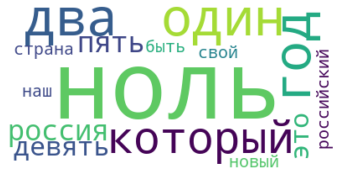


Тема 2: 


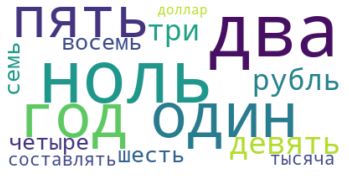


Тема 3: 


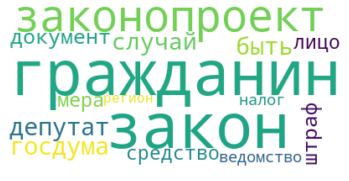


Тема 4: 


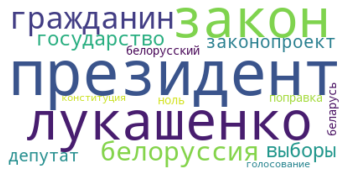


Тема 5: 


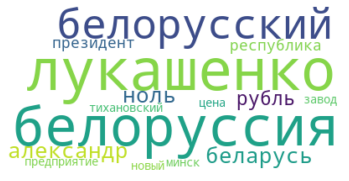


Тема 6: 


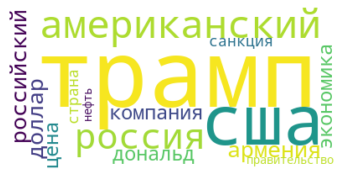


Тема 7: 


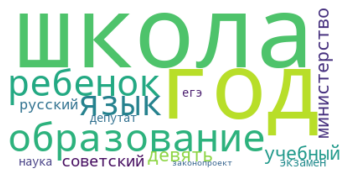


Тема 8: 


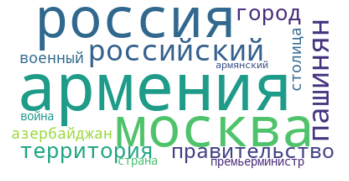


Тема 9: 


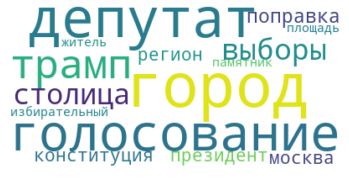


Тема 10: 


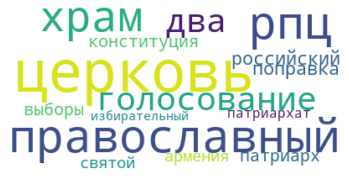

In [102]:
import matplotlib.pyplot as plt
terms = vectorizer_texts.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Тема "+ str(i + 1) +": ")
    
    #for t in sorted_terms:
        #print(t[0], end = ' ')
    
    text = ' '.join([str(t[0]) for t in sorted_terms])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print()

In [103]:
titles = [item[1][0] for item in data.iterrows()]

vectorizer_titles = TfidfVectorizer()

vecs_titles = vectorizer_titles.fit_transform(titles)

In [104]:
X = vecs_titles
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

TruncatedSVD(n_components=10, n_iter=100, random_state=122)

Тема 1: 


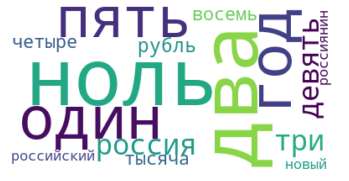


Тема 2: 


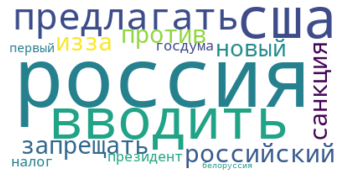


Тема 3: 


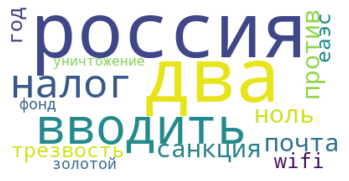


Тема 4: 


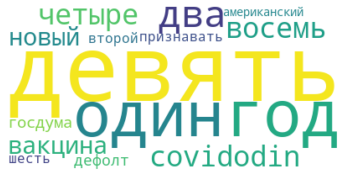


Тема 5: 


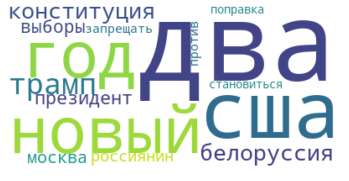


Тема 6: 


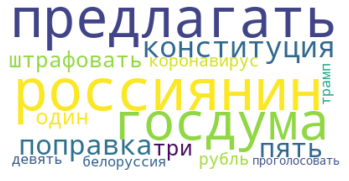


Тема 7: 


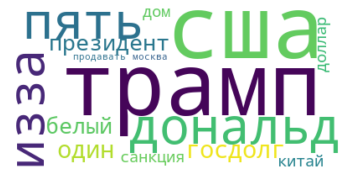


Тема 8: 


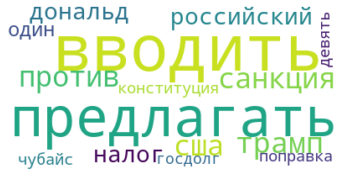


Тема 9: 


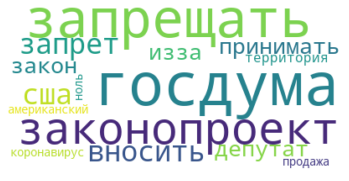


Тема 10: 


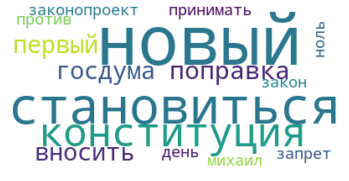

In [105]:
import matplotlib.pyplot as plt
terms = vectorizer_titles.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Тема "+ str(i + 1) +": ")
    
    #for t in sorted_terms:
        #print(t[0], end = ' ')
    
    text = ' '.join([str(t[0]) for t in sorted_terms])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print()